In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import librosa
import pickle
from IPython.display import Audio

## Preprocessing

In [2]:

DATASET_PATH = r"C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3\data_extraction\data_previews"

train_data = []
for path in glob.iglob(os.path.join(DATASET_PATH, "*.mp3")):
    video_id = path.split("\\")[-1]
    video_id = video_id.split("_")[-1]
    video_id = video_id.split(".")[0]
    train_data.append({"track_id":video_id, "path": path})
    
    
train_data = pd.DataFrame(train_data)
train_data.head(10)

,track_id,path
0,7pse475uICmWRY5hEkvPvI,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
1,6AoYWCzsDls6c61Zp5qTuU,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
2,6QZtmgaUkxWk3Rlq3Upll6,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
3,1jBmW1fRXgLhy1XwE0SJTN,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
4,4GYWNXDrG5wWOJteicSy7b,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
5,4COGASZEbAxmH6k5gYMo6G,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
6,0r0UDwngm74U5ccMQ9gMBM,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
7,3Ot04s80MZBhiYP2wHo0is,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
8,3EYTVekyY04eqdoi2iGlgJ,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...
9,4NQQ5fK6qOEMsJNlhjUkIg,C:\Code\UTEC\BD2\Proyecto2\Proyecto_DB2\Parte3...


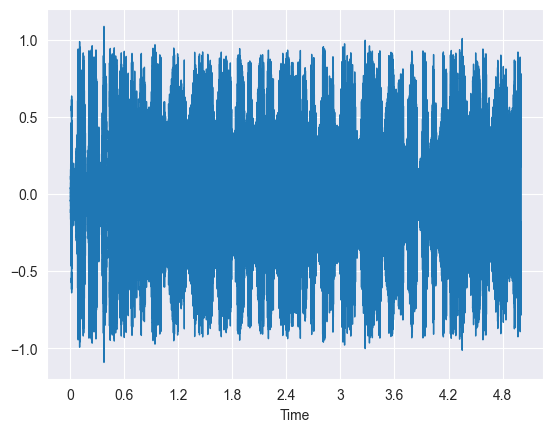

In [3]:
audio_test_path = train_data["path"][7]
y, sr = librosa.load(audio_test_path, duration=5)
librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)
mffc_test = librosa.feature.mfcc(y=y, sr=sr)

In [4]:
print(mffc_test.shape)


(20, 216)


## Processing

In [5]:
# FIXME: Try with other ways to get the features
def getFeatures_measures(paths):
    features = []
    track_ids = []
    counter_audio = 0
    # get a vector of vector per audio file
    for path in paths:
        try:
            y, sr = librosa.load(path, duration=5)
            # get features
            # FIXME: Probar luego con vector de varias metricas como mean, std, etc
            # Por ahora se esta probando solo con mfcc
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            features.append(mfccs)
            # get track id
            track_id = path.split("\\")[-1].split("_")[-1].split(".")[0]
            track_ids.append(track_id)
            if(counter_audio % 100 == 0):
                print(f"File: {counter_audio}")
        except:
            print(f"Error in file {counter_audio}") 
        counter_audio += 1
        
    return track_ids, features

In [6]:
train_data_paths = np.array(train_data["path"])
track_ids, features = getFeatures_measures(train_data_paths)

File: 0
File: 100
File: 200
File: 300
File: 400
File: 500
File: 600
File: 700
File: 800
File: 900
File: 1000
File: 1100
File: 1200
File: 1300
File: 1400
File: 1500
File: 1600
File: 1700
File: 1800
File: 1900
File: 2000
File: 2100
File: 2200
File: 2300
File: 2400
File: 2500
File: 2600
File: 2700
File: 2800
File: 2900
File: 3000
File: 3100
File: 3200
File: 3300
File: 3400
File: 3500
File: 3600
File: 3700
File: 3800
File: 3900
File: 4000
File: 4100
File: 4200
File: 4300
File: 4400
File: 4500
File: 4600
File: 4700
File: 4800
File: 4900
File: 5000
File: 5100
File: 5200
File: 5300
File: 5400
File: 5500
File: 5600
File: 5700
File: 5800
File: 5900
File: 6000
File: 6100
File: 6200
File: 6300
File: 6400
File: 6500
File: 6600
File: 6700
File: 6800
File: 6900
File: 7000
File: 7100
File: 7200
File: 7300
File: 7400
File: 7500
File: 7600
File: 7700
File: 7800
File: 7900
File: 8000
File: 8100
File: 8200
File: 8300
File: 8400
File: 8500
File: 8600
File: 8700
File: 8800
File: 8900
File: 9000
File: 9100


In [7]:
# test
print(track_ids[0:5])
print(features[0:2])

print(len(track_ids))
print(len(features))
print(len(features[0]))
print(len(features[0][0]))

print(features[0].shape)

['7pse475uICmWRY5hEkvPvI', '6AoYWCzsDls6c61Zp5qTuU', '6QZtmgaUkxWk3Rlq3Upll6', '1jBmW1fRXgLhy1XwE0SJTN', '4GYWNXDrG5wWOJteicSy7b']
[array([[-1.24458366e+02, -5.35319824e+01, -4.82177887e+01, ...,
        -2.33351192e+01, -2.46008682e+01, -2.58477707e+01],
       [ 1.31253784e+02,  1.31555389e+02,  1.25097565e+02, ...,
         1.12142929e+02,  9.85629730e+01,  9.18379974e+01],
       [-4.99427643e+01, -4.58641052e+01, -4.81339493e+01, ...,
         5.96944988e-02, -4.54313135e+00, -1.36644688e+01],
       ...,
       [ 6.37534618e-01,  6.78348970e+00,  5.21174622e+00, ...,
        -5.58464718e+00, -4.19705200e+00, -7.74638128e+00],
       [-6.77558804e+00, -6.46060848e+00, -6.90175438e+00, ...,
        -6.90769482e+00, -1.38357925e+01, -1.29718580e+01],
       [-2.39498043e+00,  2.12121487e-01,  4.15001678e+00, ...,
         1.44217691e+01,  1.22430010e+01,  7.40419006e+00]], dtype=float32), array([[-113.389885 ,  -49.002373 ,  -41.515217 , ...,  -59.809456 ,
         -72.414406 ,  -65

In [8]:
# test if the dimensions are the same for every file

for counter, feature in enumerate(features):
    if feature.shape != (20, 216):
        features.pop(counter)
        track_ids.pop(counter)
print(len(features))


12061


In [9]:
# save the data in .pkl
with open("feature_spotify_10seg.pkl", "wb") as file: 
    pickle.dump(track_ids, file)
    pickle.dump(features, file)
    

In [10]:
# load the data
with open("feature_spotify_10seg.pkl", "rb") as file:
    track_ids = pickle.load(file)
    features = pickle.load(file)

In [11]:
# test
print(track_ids[0:5])
print(features[0:2])

print(len(track_ids))
print(len(features))

['7pse475uICmWRY5hEkvPvI', '6AoYWCzsDls6c61Zp5qTuU', '6QZtmgaUkxWk3Rlq3Upll6', '1jBmW1fRXgLhy1XwE0SJTN', '4GYWNXDrG5wWOJteicSy7b']
[array([[-1.24458366e+02, -5.35319824e+01, -4.82177887e+01, ...,
        -2.33351192e+01, -2.46008682e+01, -2.58477707e+01],
       [ 1.31253784e+02,  1.31555389e+02,  1.25097565e+02, ...,
         1.12142929e+02,  9.85629730e+01,  9.18379974e+01],
       [-4.99427643e+01, -4.58641052e+01, -4.81339493e+01, ...,
         5.96944988e-02, -4.54313135e+00, -1.36644688e+01],
       ...,
       [ 6.37534618e-01,  6.78348970e+00,  5.21174622e+00, ...,
        -5.58464718e+00, -4.19705200e+00, -7.74638128e+00],
       [-6.77558804e+00, -6.46060848e+00, -6.90175438e+00, ...,
        -6.90769482e+00, -1.38357925e+01, -1.29718580e+01],
       [-2.39498043e+00,  2.12121487e-01,  4.15001678e+00, ...,
         1.44217691e+01,  1.22430010e+01,  7.40419006e+00]], dtype=float32), array([[-113.389885 ,  -49.002373 ,  -41.515217 , ...,  -59.809456 ,
         -72.414406 ,  -65